In [3]:
!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

In [4]:
import torch 
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

device = "cuda"

# 파이프라인 불러오기
repo_id = "stabilityai/stable-diffusion-2-base"
pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16, revision="fp16")

pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

/opt/conda/lib/python3.9/site-packages/diffusers/pipelines/pipeline_utils.py:263: FutureWarning: You are loading the variant fp16 from stabilityai/stable-diffusion-2-base via `revision='fp16'` even though you can load it via `variant=`fp16`. Loading model variants via `revision='fp16'` is deprecated and will be removed in diffusers v1. Please use `variant='fp16'` instead.
  warnings.warn(
text_encoder/model.safetensors not found


Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/340 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/681M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

In [5]:
prompt = str(input('prompt: '))  # 프롬프트를 영어로 입력해보세요

prompt: tree


  0%|          | 0/25 [00:00<?, ?it/s]

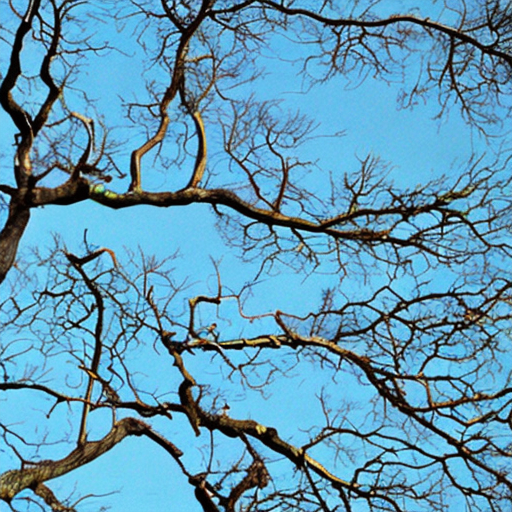

In [7]:
# 이미지 저장 폴더 만들기   
import os
#os.mkdir("/aiffel/aiffel/diffusers")    # diffusers 폴더를 이미 만들었다면 주석 처리해 주세요.

# 입력한 프롬프트를 사용하여 이미지 생성 
image = pipe(prompt, num_inference_steps=25).images[0]

# 이미지 저장
image.save("/aiffel/aiffel/diffusers/image.png")  

# 이미지 출력 
image

In [8]:
# GPU 메모리를 지우는 코드입니다. 
torch.cuda.empty_cache()

In [9]:
# Image-to-Image Generation 파이프라인 불러오기    
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


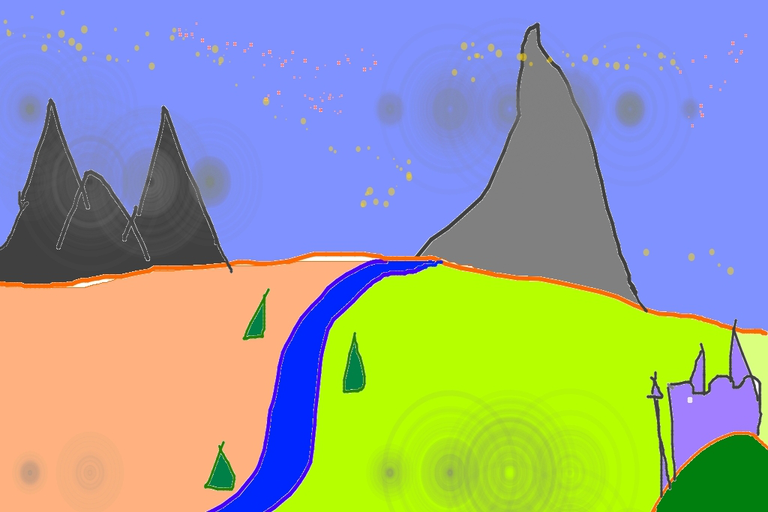

In [11]:
import requests  
from io import BytesIO
from PIL import Image  # PIL 라이브러리의 Image 모듈을 불러옵니다.

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# url 호출하기
response = requests.get(url)

# 이미지 열기
init_img = Image.open(BytesIO(response.content)).convert("RGB")  # 이미지를 메모리로 읽어와서 RGB로 변경합니다. 
init_img = init_img.resize((768, 512))  # 이미지의 크기를 조절합니다. 
init_img

In [12]:
prompt = "A fantasy landscape, trending on artstation"

  0%|          | 0/37 [00:00<?, ?it/s]

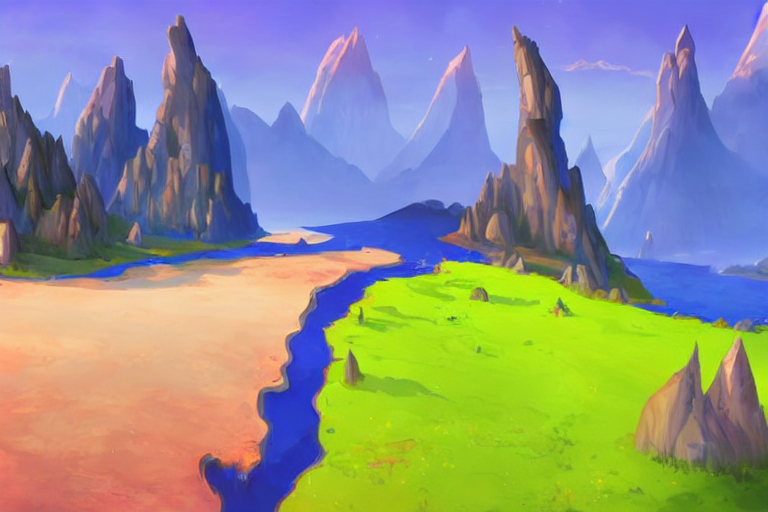

In [13]:
generator = torch.Generator(device=device).manual_seed(1024)   # 모델을 사용할 때마다 동일한 이미지를 생성하기 위해 seed를 설정합니다.  

images = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5).images
images[0].save("/aiffel/aiffel/diffusers/fantasy_landscape.png")
images[0]

In [18]:
import torch
import numpy as np

# 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

num_images = 2

# 프롬프트 입력
prompt = ['A fantasy landscape, trending on artstation'] * num_images

# 이미지 생성 (예시 코드, 실제로는 pipe 함수를 어떻게 정의했는지에 따라 수정 필요)
generator = torch.Generator(device=device).manual_seed(1024)
images = pipe(prompt=prompt, image=init_img, strength=0.9, guidance_scale=13.5, num_inference_steps=50, generator=generator).images
images

def image_grid(images, rows, cols):
    # 이미지를 그리드로 배열
    grid = np.concatenate([np.concatenate(images[i:i+cols], axis=1) for i in range(0, len(images), cols)], axis=0)
    return grid

# 이미지 출력
grid = image_grid(images, rows=1, cols=2)
grid


  0%|          | 0/45 [00:00<?, ?it/s]

array([[[ 55,  73, 113],
        [ 49,  69, 122],
        [ 50,  70, 124],
        ...,
        [ 52,  46,  93],
        [ 52,  46,  98],
        [ 53,  51,  91]],

       [[ 49,  70, 122],
        [ 51,  68, 125],
        [ 50,  66, 124],
        ...,
        [ 53,  44,  95],
        [ 52,  46,  96],
        [ 52,  45,  90]],

       [[ 49,  68, 123],
        [ 50,  66, 124],
        [ 50,  68, 126],
        ...,
        [ 55,  47,  97],
        [ 55,  46,  97],
        [ 54,  48,  94]],

       ...,

       [[ 56,  55,  45],
        [ 55,  52,  45],
        [ 58,  60,  52],
        ...,
        [ 50,  61,  16],
        [ 52,  61,  17],
        [ 38,  44,   8]],

       [[ 53,  48,  39],
        [ 58,  55,  47],
        [ 58,  59,  52],
        ...,
        [ 57,  61,  10],
        [ 49,  61,  16],
        [ 35,  44,   9]],

       [[ 51,  46,  44],
        [ 51,  49,  47],
        [ 52,  51,  46],
        ...,
        [ 55,  58,  14],
        [ 43,  48,  14],
        [ 51,  47,  17]]